In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

loans = pd.read_csv('/content/loan_data.csv')
loans.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


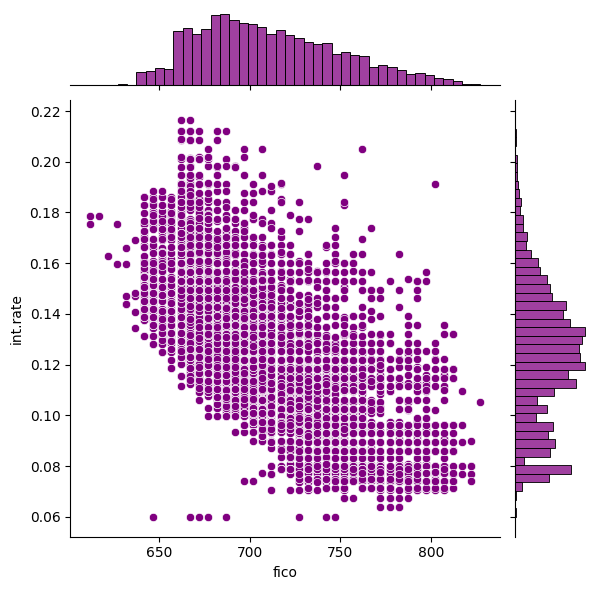

In [3]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

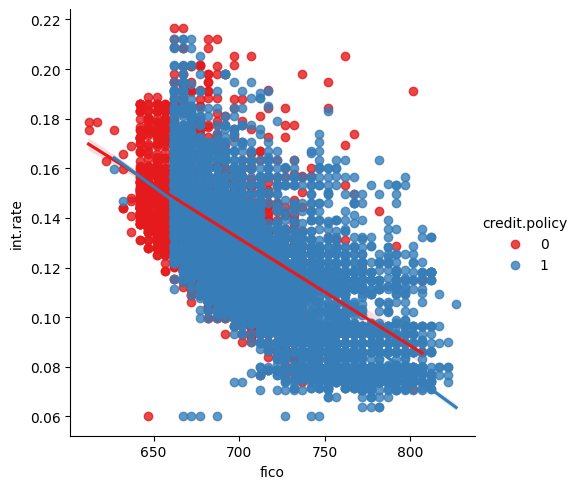

In [4]:
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', palette='Set1')


In [5]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [6]:
x = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# from decision tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(x_test)

In [7]:
confusion_matrix(y_test, predictions)
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.83      0.84      2408\n           1       0.20      0.22      0.21       466\n\n    accuracy                           0.73      2874\n   macro avg       0.53      0.53      0.53      2874\nweighted avg       0.74      0.73      0.74      2874\n'

In [8]:
# from random forest classification
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
r_pred = rfc.predict(x_test)

confusion_matrix(y_test, r_pred)
classification_report(y_test, r_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.99      0.91      2408\n           1       0.39      0.02      0.04       466\n\n    accuracy                           0.84      2874\n   macro avg       0.62      0.51      0.47      2874\nweighted avg       0.77      0.84      0.77      2874\n'